## TEST GROUND STATE DMRG FOR THE HEISENBERG SPIN CHAIN

In [2]:
import mpo, mps
# mps.py supplies the class MPS, which encapsulates all information about the state
# mpo.py supplies the class MPO, which captures all information about the interaction

# let us sweep over a range of sizes, and bond-dimensions chi
L_arr = np.array([16,24,32,48,64])
chi_arr = np.array([4, 8, 12, 16])


EEs = np.zeros((len(L_arr), len(chi_arr)))
GSEs = []
for cL, L in enumerate(L_arr):
    GSEs.append([])
    W1 = mpo.MPO({'N': L})
    W1.make_MPO()
    for cc, chi in enumerate(chi_arr):
        GSW, GSE = W1.get_GS(params={'chi': chi})
        EEs[cL, cc] = GSW.get_EE()
        GSEs[cL].append(GSE)
#         print("L = {0:d} and chi = {1:d}".format(L, chi))

## Entanglement entropy calculation
The entanglement entropy captures the extent of quantum-ness in the system.
The fact that it saturates with $\chi$ means that our compression routine is performing well.

Text(0.5,1,'Entanglement entropy of the ground state')

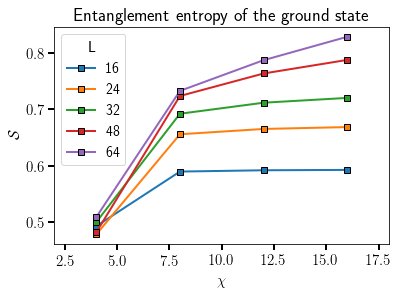

In [6]:
for c in np.arange(len(L_arr)):
    plt.plot(chi_arr, EEs[c,:], '-s', markeredgecolor='k', label='{0:d}'.format(L_arr[c]))
#plt.plot(chi_arr, np.log(chi_arr), '--k')
plt.xlabel('$\chi$')
plt.ylabel('$\mathcal{S}$')
plt.legend(loc='best', title='L')
plt.xlim(2,18)
plt.title('Entanglement entropy of the ground state')

The ground state energies also saturate, and approach the Bethe ansatz value as the size of the system is increased.

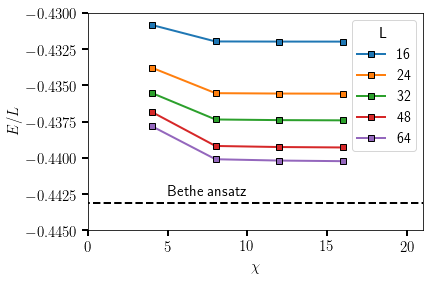

In [7]:
for c1 in np.arange(len(L_arr)):
    G = []
    for c2 in np.arange(len(chi_arr)):
        G.append(GSEs[c1][c2][-1])
    plt.plot(chi_arr, np.array(G)/L_arr[c1], '-s', markeredgecolor='k', label='{0:d}'.format(L_arr[c1]))
Bethe_ansatz = -np.log(2)+0.25
plt.plot([-3,22], np.ones(2)*Bethe_ansatz, '--k')
plt.text(5, -0.4426, 'Bethe ansatz')
plt.xlabel('$\chi$')
plt.ylabel('$E/L$')
plt.xlim(0,21)
plt.ylim(-0.445, -0.43)
plt.legend(loc='best', title='L')

In [10]:
GSEs.shape

AttributeError: 'list' object has no attribute 'shape'

/Users/akshaykri/anaconda2/lib/python2.7/site-packages/matplotlib/ticker.py:2207: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


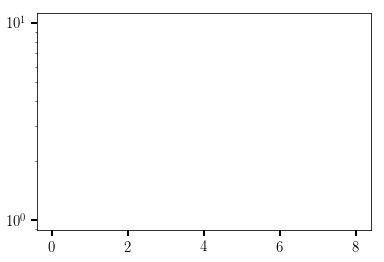

In [8]:
p = EEs[-1, -1]#-28.1754248597421
plt.plot(np.array(GSEs[4][0])-p)
plt.plot(np.array(GSEs[4][1])-p)
plt.plot(np.array(GSEs[4][2])-p)
plt.plot(np.array(GSEs[4][3])-p)
plt.yscale('log')

In [35]:
print("{0:.12f}\n{1:.12f}\n{2:.12f}".format(GSEs[4][3][259],GSEs[4][3][659],GSEs[4][3][1259]))

-28.175283597531
-28.175292068916
-28.175292928781


In [38]:
import mpo, mps
reload(mpo)
reload(mps)
L_arr = np.array([16,24,32,48,64])
chi_arr = np.array([4,8,12])
EEs = np.zeros((len(L_arr), len(chi_arr)))
GSEs = []
for cL, L in enumerate(L_arr):
    GSEs.append([])
    W1 = mpo.MPO({'N': L, 'Ham': 'TFIM'})
    W1.make_MPO()
    for cc, chi in enumerate(chi_arr):
        GSW, GSE = W1.get_GS(params={'chi': chi})
        EEs[cL, cc] = GSW.get_EE()
        GSEs[cL].append(GSE)
        print("L = {0:d} and chi = {1:02d}: E = {2:f}, S = {3:f}".format(L, chi, GSE[-1], EEs[cL, cc]))

L = 16 and chi = 04: E = -20.015766, S = 0.417015
L = 16 and chi = 08: E = -20.016388, S = 0.423405
L = 16 and chi = 12: E = -20.016388, S = 0.423409
L = 24 and chi = 04: E = -30.104406, S = 0.338009
L = 24 and chi = 08: E = -30.199710, S = 0.460054
L = 24 and chi = 12: E = -30.199712, S = 0.460207
L = 32 and chi = 04: E = -40.248862, S = 0.306651
L = 32 and chi = 08: E = -40.384298, S = 0.484691
L = 32 and chi = 12: E = -40.375211, S = 0.424805
L = 48 and chi = 04: E = -60.527970, S = 0.247984
L = 48 and chi = 08: E = -60.719513, S = 0.414470
L = 48 and chi = 12: E = -60.740593, S = 0.345989
L = 64 and chi = 04: E = -80.812836, S = 0.287145
L = 64 and chi = 08: E = -81.125384, S = 0.527273
L = 64 and chi = 12: E = -81.105555, S = 0.471111
